In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json

In [2]:
ckpts5 = [int(_) for _ in ["416","833", "1250", "1666", "2080"]]


In [3]:
test_accs_all_geq = []
train_accs_all_geq = []
for ckpt in ckpts5:
    test_accs = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
    train_accs = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all_geq.append(test_accs.mean())
    train_accs_all_geq.append(train_accs.mean())


test_accs_all_geq = np.array(test_accs_all_geq)
train_accs_all_geq = np.array(train_accs_all_geq)

0.06352
0.1028
0.13896
0.1588
0.16528


In [4]:
test_accs_all_leq = []
train_accs_all_leq = []

for ckpt in ckpts5:
    test_accs = (np.load("ckpts/math_aug3_unmemorized_leq_3_total10000_epochs5/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
    train_accs = (np.load("ckpts/math_aug3_unmemorized_leq_3_total10000_epochs5/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all_leq.append(test_accs.mean())
    train_accs_all_leq.append(train_accs.mean())
    
test_accs_all_leq = np.array(test_accs_all_leq)
train_accs_all_leq = np.array(train_accs_all_leq)

0.05612
0.1086
0.1358
0.15184
0.16256


In [6]:
test_accs_all_rand = []
train_accs_all_rand = []

for ckpt in ckpts5:
    test_accs = (np.load("ckpts/math_aug3_rand_total10000_epochs5/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
    train_accs = (np.load("ckpts/math_aug3_rand_total10000_epochs5/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all_rand.append(test_accs.mean())
    train_accs_all_rand.append(train_accs.mean())
    
test_accs_all_rand = np.array(test_accs_all_rand)
train_accs_all_rand = np.array(train_accs_all_rand)

0.06152
0.09992
0.12096
0.13252
0.14228


Text(0.5, 1.0, 'MATH (10000 expls, 5epochs)')

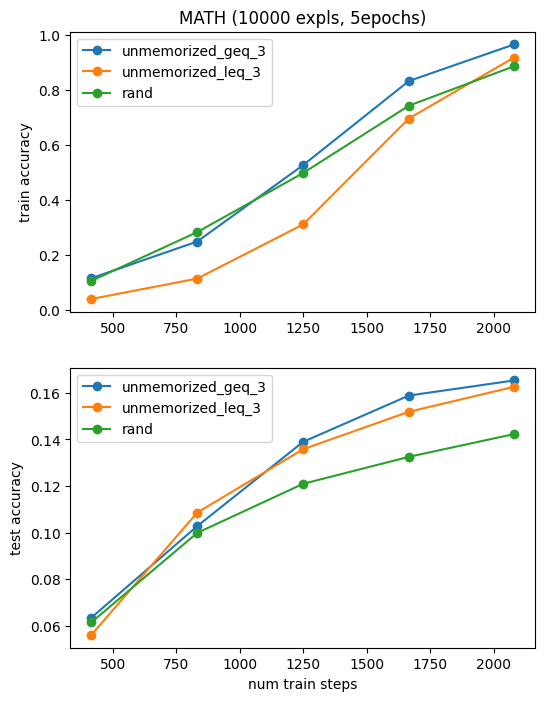

In [10]:

# make 2 subplots vertically stacked
fig, ax = plt.subplots(2, 1, figsize=(6, 8))


ax[0].plot(ckpts5, train_accs_all_geq, "o-", label="unmemorized_geq_3")
ax[0].plot(ckpts5, train_accs_all_leq, "o-",label="unmemorized_leq_3")
ax[0].plot(ckpts5, train_accs_all_rand,"o-", label="rand")

ax[0].legend()

ax[0].set_ylabel("train accuracy")

ax[1].plot(ckpts5, test_accs_all_geq, "o-", label="unmemorized_geq_3")
ax[1].plot(ckpts5, test_accs_all_leq, "o-",label="unmemorized_leq_3")
ax[1].plot(ckpts5, test_accs_all_rand,"o-", label="rand")

ax[1].legend()

ax[1].set_xlabel("num train steps")
ax[1].set_ylabel("test accuracy")

ax[0].set_title("MATH (10000 expls, 5epochs)")

In [11]:
with open('data/MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('data/MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [12]:
num_memorized_all_geq = []
num_correct_different_all_geq = []
num_incorrect_all_geq = []


subsample_idxs_geq = np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/subsample_idxs.npy")


for ckpt in ckpts5:
    train_correct = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs_geq[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all_geq.append(num_memorized_ckpt)
    num_correct_different_all_geq.append(num_correct_different_ckpt)
    num_incorrect_all_geq.append(num_incorrect_ckpt)
    
num_memorized_all_geq = np.array(num_memorized_all_geq)
num_correct_different_all_geq = np.array(num_correct_different_all_geq)
num_incorrect_all_geq = np.array(num_incorrect_all_geq)

In [13]:
num_memorized_all_leq = []
num_correct_different_all_leq = []
num_incorrect_all_leq = []


subsample_idxs_leq = np.load("ckpts/math_aug3_unmemorized_leq_3_total10000_epochs5/subsample_idxs.npy")


for ckpt in ckpts5:
    train_correct = (np.load("ckpts/math_aug3_unmemorized_leq_3_total10000_epochs5/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("ckpts/math_aug3_unmemorized_leq_3_total10000_epochs5/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs_leq[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all_leq.append(num_memorized_ckpt)
    num_correct_different_all_leq.append(num_correct_different_ckpt)
    num_incorrect_all_leq.append(num_incorrect_ckpt)
    
num_memorized_all_leq = np.array(num_memorized_all_leq)
num_correct_different_all_leq = np.array(num_correct_different_all_leq)
num_incorrect_all_leq = np.array(num_incorrect_all_leq)

In [15]:
num_memorized_all_rand = []
num_correct_different_all_rand = []
num_incorrect_all_rand = []


subsample_idxs_rand = np.load("ckpts/math_aug3_rand_total10000_epochs5/subsample_idxs.npy")


for ckpt in ckpts5:
    train_correct = (np.load("ckpts/math_aug3_rand_total10000_epochs5/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("ckpts/math_aug3_rand_total10000_epochs5/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs_rand[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all_rand.append(num_memorized_ckpt)
    num_correct_different_all_rand.append(num_correct_different_ckpt)
    num_incorrect_all_rand.append(num_incorrect_ckpt)

num_memorized_all_rand = np.array(num_memorized_all_rand)
num_correct_different_all_rand = np.array(num_correct_different_all_rand)
num_incorrect_all_rand = np.array(num_incorrect_all_rand)

Text(0.5, 1.0, 'MATH (10000 train expls) rand')

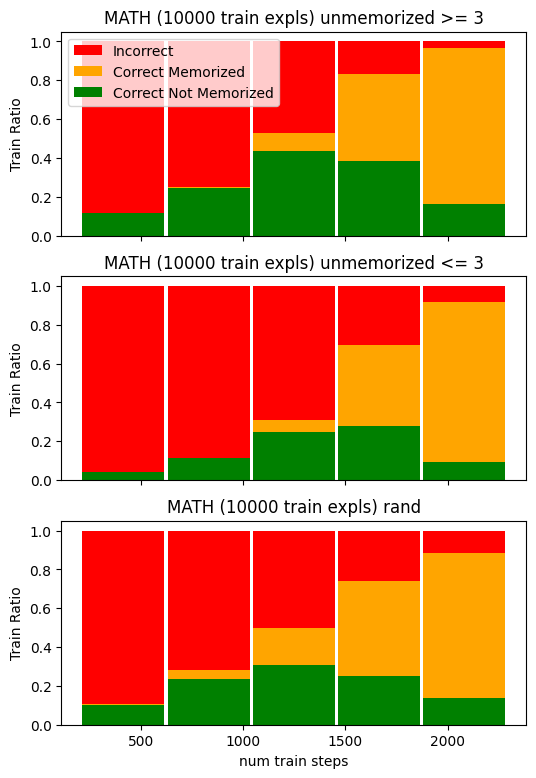

In [18]:
bar_width = 400

num_ckpts = len(ckpts5)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 9), sharex=True, sharey=True)
ax1.bar(ckpts5, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax1.bar(ckpts5, [1-(num_incorrect_all_geq/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax1.bar(ckpts5, [1-(num_incorrect_all_geq/5).mean(axis=1)[i]-(num_memorized_all_geq/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)
# ax1.set_xticks([2*i for i in range(1, num_ckpts+1)])
ax1.set_ylabel("Train Ratio")
ax1.set_title("MATH (10000 train expls) unmemorized >= 3")
ax1.legend()

ax2.bar(ckpts5, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax2.bar(ckpts5, [1-(num_incorrect_all_leq/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax2.bar(ckpts5, [1-(num_incorrect_all_leq/5).mean(axis=1)[i]-(num_memorized_all_leq/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)

ax2.set_ylabel("Train Ratio")
ax2.set_title("MATH (10000 train expls) unmemorized <= 3")

ax3.bar(ckpts5, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax3.bar(ckpts5, [1-(num_incorrect_all_rand/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax3.bar(ckpts5, [1-(num_incorrect_all_rand/5).mean(axis=1)[i]-(num_memorized_all_rand/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)

ax3.set_xlabel("num train steps")
ax3.set_ylabel("Train Ratio")
ax3.set_title("MATH (10000 train expls) rand")





Text(0.5, 1.0, 'MATH (10000 train expls) rand (>= 3 train subset)')

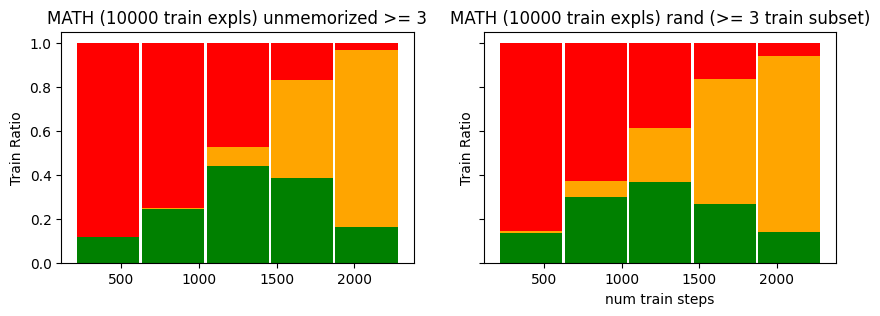

In [38]:
subsample_idxs_rand_geq_subsample  = []

for i in range(5000):
    if subsample_idxs_rand[i] in subsample_idxs_geq:
        subsample_idxs_rand_geq_subsample.append(i)

subsample_idxs_rand_geq_subsample = np.array(subsample_idxs_rand_geq_subsample)

bar_width = 400

num_ckpts = len(ckpts5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)

ax1.bar(ckpts5, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax1.bar(ckpts5, [1-(num_incorrect_all_geq/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax1.bar(ckpts5, [1-(num_incorrect_all_geq/5).mean(axis=1)[i]-(num_memorized_all_geq/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)

ax1.set_ylabel("Train Ratio")
ax1.set_title("MATH (10000 train expls) unmemorized >= 3")




ax2.bar(ckpts5, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax2.bar(ckpts5, [1-(num_incorrect_all_rand/5)[:, subsample_idxs_rand_geq_subsample].mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax2.bar(ckpts5, [1-(num_incorrect_all_rand/5)[:, subsample_idxs_rand_geq_subsample].mean(axis=1)[i]-(num_memorized_all_rand/5)[:, subsample_idxs_rand_geq_subsample].mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)

ax2.set_xlabel("num train steps")
ax2.set_ylabel("Train Ratio")
ax2.set_title("MATH (10000 train expls) rand (>= 3 train subset)")


In [50]:
subsample_idxs_rand_geq_subsample  = []
subsample_idxs_geq_rand_subsample = []

for i in range(5000):
    for j in range(5000):
        if subsample_idxs_rand[i] == subsample_idxs_geq[j]:
            subsample_idxs_rand_geq_subsample.append(i)
            subsample_idxs_geq_rand_subsample.append(j)

subsample_idxs_rand_geq_subsample = np.array(subsample_idxs_rand_geq_subsample)
subsample_idxs_geq_rand_subsample = np.array(subsample_idxs_geq_rand_subsample)

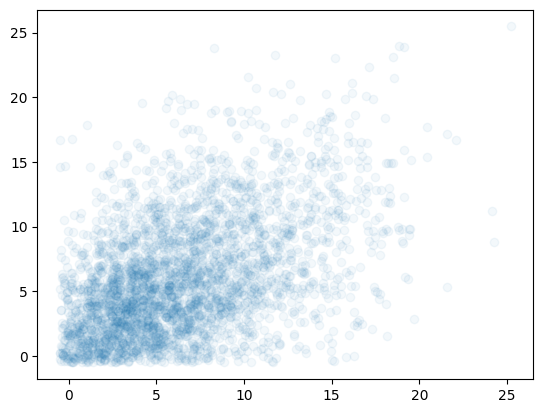

In [55]:
plt.scatter(num_correct_different_all_geq[:, subsample_idxs_geq_rand_subsample].sum(axis=0)+np.random.uniform(-0.5, 0.5, 3222), num_correct_different_all_rand[:, subsample_idxs_rand_geq_subsample].sum(axis=0)+np.random.uniform(-0.5, 0.5, 3222), alpha=0.05)



Text(0.5, 1.0, 'MATH (10000 train expls) rand (<= 3 train subset)')

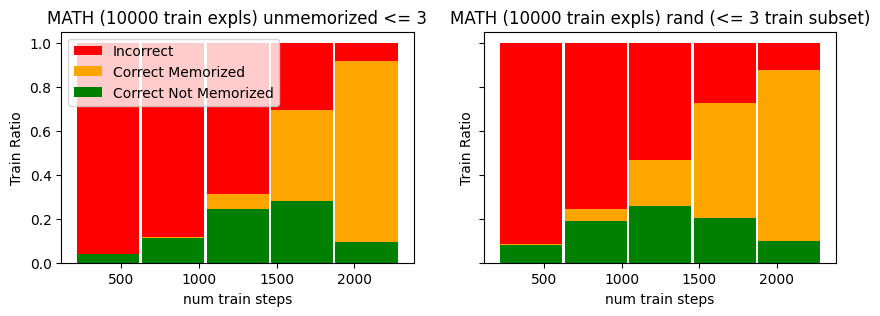

In [39]:
subsample_idxs_rand_leq_subsample  = []

for i in range(5000):
    if subsample_idxs_rand[i] in subsample_idxs_leq:
        subsample_idxs_rand_leq_subsample.append(i)

subsample_idxs_rand_leq_subsample = np.array(subsample_idxs_rand_leq_subsample)

bar_width = 400

num_ckpts = len(ckpts5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
ax1.bar(ckpts5, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax1.bar(ckpts5, [1-(num_incorrect_all_leq/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax1.bar(ckpts5, [1-(num_incorrect_all_leq/5).mean(axis=1)[i]-(num_memorized_all_leq/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)
# ax1.set_xticks([2*i for i in range(1, num_ckpts+1)])
ax1.set_ylabel("Train Ratio")
ax1.set_xlabel("num train steps")

ax1.set_title("MATH (10000 train expls) unmemorized <= 3")
ax1.legend()


ax2.bar(ckpts5, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax2.bar(ckpts5, [1-(num_incorrect_all_rand/5)[:, subsample_idxs_rand_leq_subsample].mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax2.bar(ckpts5, [1-(num_incorrect_all_rand/5)[:, subsample_idxs_rand_leq_subsample].mean(axis=1)[i]-(num_memorized_all_rand/5)[:, subsample_idxs_rand_leq_subsample].mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)

ax2.set_xlabel("num train steps")
ax2.set_ylabel("Train Ratio")
ax2.set_title("MATH (10000 train expls) rand (<= 3 train subset)")


Text(0.5, 1.0, 'MATH (10000 train expls)')

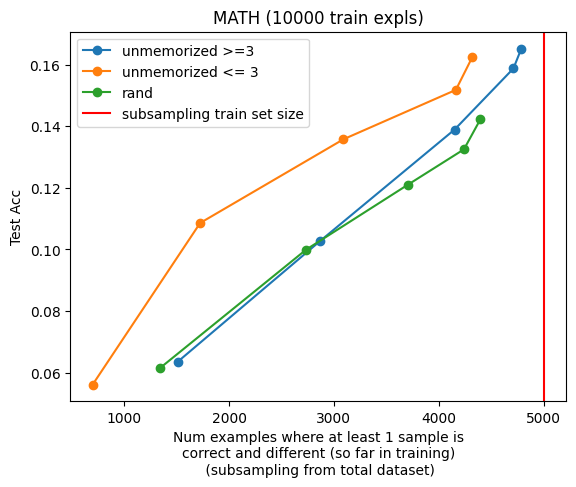

In [59]:
cummulative_num_correct_different_geq = []
for i in range(len(num_correct_different_all_geq)):
    # cummulative_num_correct_different5.append((num_correct_different_all5[:i+1].max(axis=0)>=1).sum())
    # cummulative_num_correct_different5.append((num_correct_different_all5[:i+1].max(axis=0)>=4).sum())
    cummulative_num_correct_different_geq.append((num_correct_different_all_geq[:i+1].max(axis=0)>=1).sum())


cummulative_num_correct_different_geq = np.array(cummulative_num_correct_different_geq)

plt.plot(cummulative_num_correct_different_geq, test_accs_all_geq, "o-", label = "unmemorized >=3 ")


cummulative_num_correct_different_leq = []
for i in range(len(num_correct_different_all_leq)):
    # cummulative_num_correct_different10.append((num_correct_different_all10[:i+1].max(axis=0)>=3).sum())
    cummulative_num_correct_different_leq.append((num_correct_different_all_leq[:i+1].max(axis=0)>=1).sum())

cummulative_num_correct_different_leq = np.array(cummulative_num_correct_different_leq)
plt.plot(cummulative_num_correct_different_leq, test_accs_all_leq, "o-", label = "unmemorized <= 3")


cummulative_num_correct_different_rand = []
for i in range(len(num_correct_different_all_rand)):
    # cummulative_num_correct_different20.append((num_correct_different_all20[:i+1].max(axis=0)>=3).sum())
    cummulative_num_correct_different_rand.append((num_correct_different_all_rand[:i+1].max(axis=0)>=1).sum())

cummulative_num_correct_different_rand = np.array(cummulative_num_correct_different_rand)
plt.plot(cummulative_num_correct_different_rand, test_accs_all_rand, "o-", label = "rand")


plt.axvline(5000, color = "red", label = "subsampling train set size")
plt.legend()


plt.xlabel("Num examples where at least 1 sample is\ncorrect and different (so far in training)\n (subsampling from total dataset)")
plt.ylabel("Test Acc")
plt.title("MATH (10000 train expls)")


In [60]:
num_correct_different_all_geq.sum()

33653

In [61]:
num_correct_different_all_leq.sum()

19269

In [62]:
num_correct_different_all_rand.sum()

25709

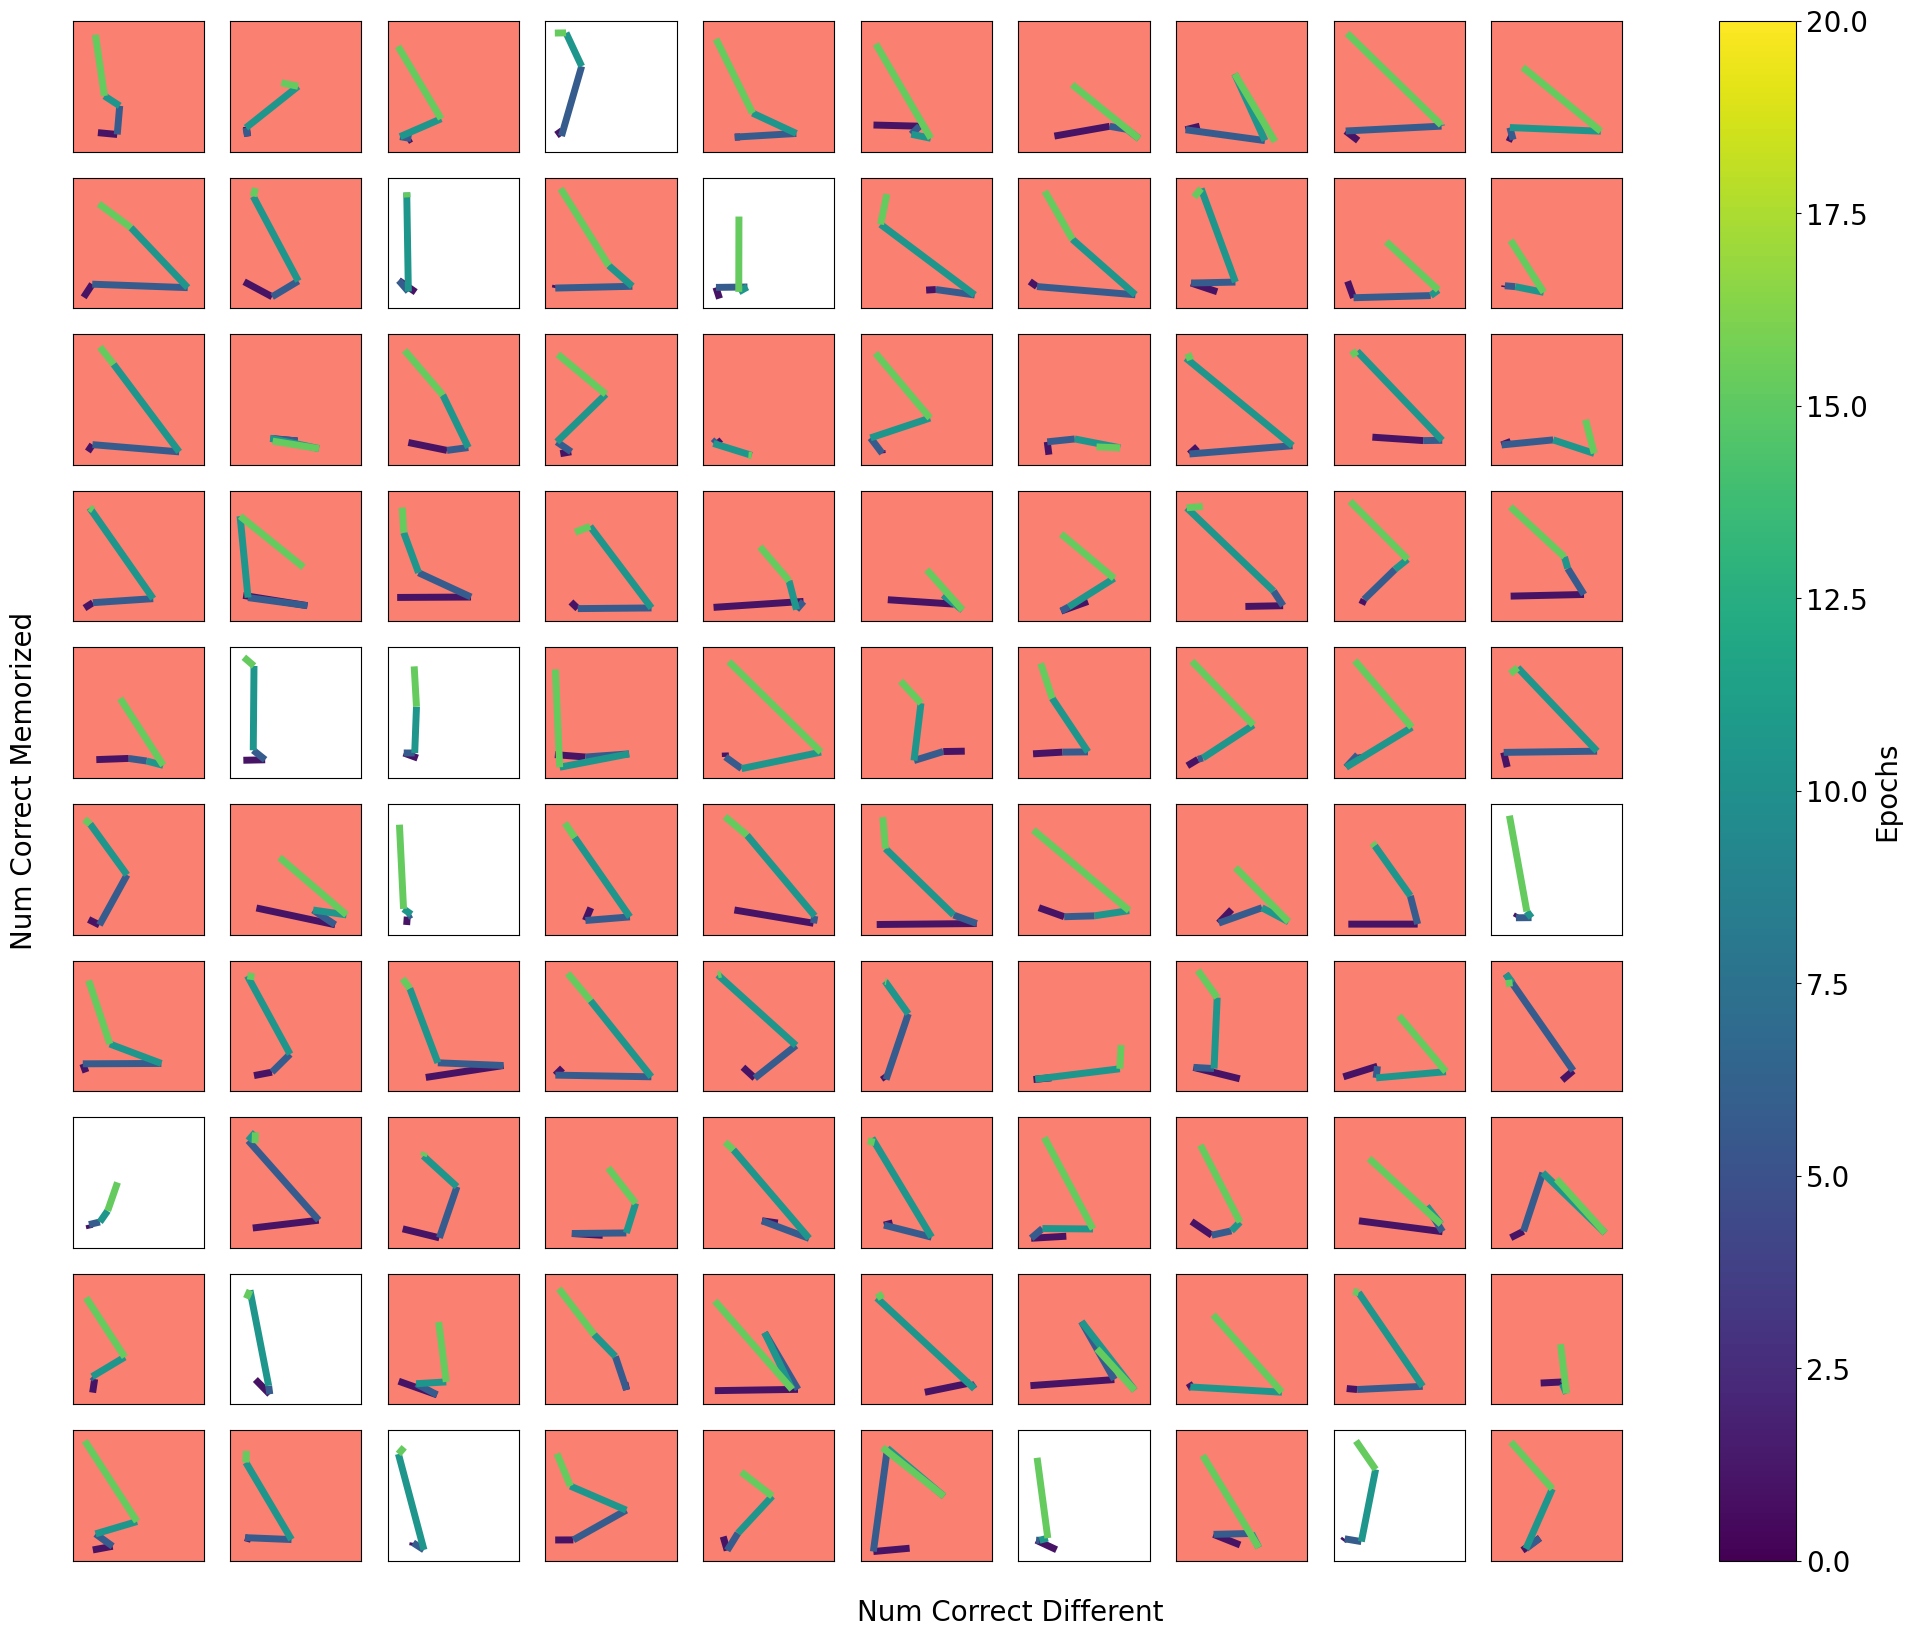

In [57]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

num_ckpts = len(num_correct_different_all_geq)

# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
color_values = np.linspace(1, 20, num_ckpts)




for i in range(100):
    x = num_correct_different_all_geq[:, i]+np.random.uniform(-0.5, 0.5, num_ckpts)
    y = num_memorized_all_geq[:, i]+np.random.uniform(-0.5, 0.5, num_ckpts)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 20), alpha=1)
    lc.set_array(color_values)
    lc.set_linewidth(5)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    ax[i//10][i%10].set_xlim(-1, 6)
    ax[i//10][i%10].set_ylim(-1, 6)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>1.5:
        ax[i//10][i%10].set_facecolor('salmon')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('Epochs', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)

plt.savefig("delete.png")